# Prediction using unsupervised ML

In this task, we'll learn how to implement clustering algorithm k-means.

## K-means clustering

We cluster the flowers into species according to their Sepal length, Sepal width, Petal length, Petal width.<br>
The flower species we are clustering are Iris-setosa, Iris-versicolor, Iris-virginica.

### Libraries used in this code

**Pandas** to retrieve and manipulate data.<br>
**Matplotlib** to plot graphs and visualize the data.<br>
**Sklearn** to model the data using K-means clustering.<br>

# Author

**T Mahidhar Vardhan**

Importing the required libraires

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

**Retrieving the data**

In [2]:
data=pd.read_csv("./Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Checking for null values, total entries and data types**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Statistics of the data**

In [4]:
data.drop(['Id'],axis=1).describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Plotting the data on 2d graph**

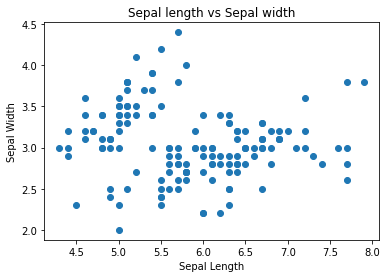

In [5]:
plt.title('Sepal length vs Sepal width')
plt.scatter(data['SepalLengthCm'].values,data['SepalWidthCm'].values)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

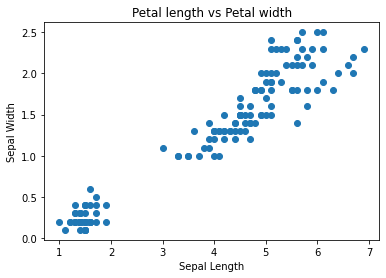

In [6]:
plt.title('Petal length vs Petal width')
plt.scatter(data['PetalLengthCm'].values,data['PetalWidthCm'].values)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

Elbow method to find out optimal number of clusters

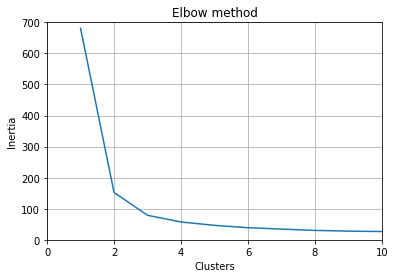

In [7]:
x = data.iloc[:, [ 1, 2, 3, 4]].values
inertia = []
for i in range(1,11):
    km = KMeans(n_clusters=i,n_init=10,max_iter=300,init='k-means++',random_state=18)
    km.fit(x)
    inertia.append(km.inertia_)

plt.plot(range(1,11),inertia)
plt.title('Elbow method')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.axis([0,10,0,700])
plt.grid()
plt.show()

From the above graph, we can infer that the number of optimal clusters are 3

Preparing the model with 3 clusters

In [8]:
km = KMeans(n_clusters=3,n_init=10,max_iter=300,init='k-means++',random_state=18)
y_pred = km.fit_predict(x)

In [9]:
re = list(zip(y_pred,data.iloc[:,-1].values))         # zipping the lists to pass as an argument for data frame
df = pd.DataFrame(re,columns=['y_pred','y_test'])
df.head()                                             # Comparing the test set and predicted set values

,y_pred,y_test
0,0,Iris-setosa
1,0,Iris-setosa
2,0,Iris-setosa
3,0,Iris-setosa
4,0,Iris-setosa


We are trying to visualize the clusters by plotting the data against Sepal length and Sepal width

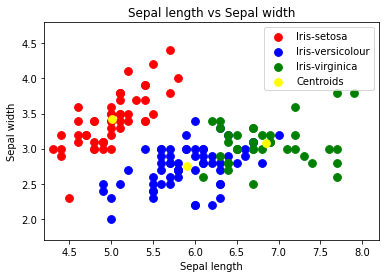

In [10]:
# plotting the data points
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], 
            s = 60, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], 
            s = 60, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1],
            s = 60, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
            s = 60, c = 'yellow', label = 'Centroids')

plt.axis([4.2,8.2,1.7,4.8])
plt.title('Sepal length vs Sepal width')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

We are trying to visualize the clusters by plotting the data against Petal length and Petal width

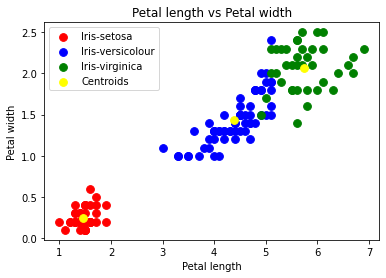

In [11]:
# plotting the data points
plt.scatter(x[y_pred == 0, 2], x[y_pred == 0, 3], 
            s = 60, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 2], x[y_pred == 1, 3], 
            s = 60, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 2], x[y_pred == 2, 3],
            s = 60, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:,3], 
            s = 60, c = 'yellow', label = 'Centroids')

plt.title('Petal length vs Petal width')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()
plt.show()

We are trying to visualize the clusters by plotting the data against Sepal length and Petal length

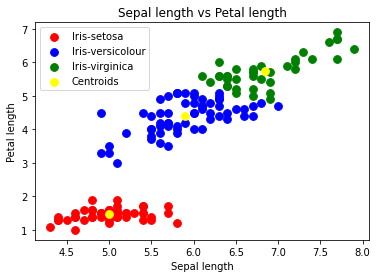

In [12]:
# plotting the data points
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 2], 
            s = 60, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 2], 
            s = 60, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 2],
            s = 60, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,2], 
            s = 60, c = 'yellow', label = 'Centroids')

plt.title('Sepal length vs Petal length')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend()
plt.show()

We are trying to visualize the clusters by plotting the data against Sepal width and Petal width

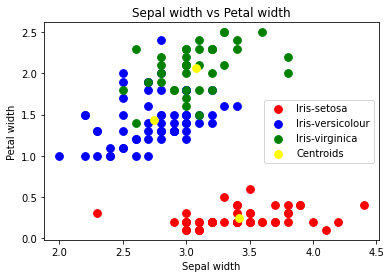

In [13]:
# plotting the data points
plt.scatter(x[y_pred == 0, 1], x[y_pred == 0, 3], 
            s = 60, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 1], x[y_pred == 1, 3], 
            s = 60, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 1], x[y_pred == 2, 3],
            s = 60, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 1], km.cluster_centers_[:,3], 
            s = 60, c = 'yellow', label = 'Centroids')

plt.title('Sepal width vs Petal width')
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.legend()
plt.show()

**Evaluating our model**

Here, we encode the flowers species in the data into 0,1,2 since our model predicts the values as 0,1,2.<br>
After encoding the data, we compare test set and predicted set to calculate the accuracy.

In [14]:
label = preprocessing.LabelEncoder()
mod = label.fit_transform(data['Species'])

In [15]:
len(mod) == len(y_pred)   # Just to make sure no data is lost

True

In [16]:
s=0
for i,j in zip(mod,y_pred):
    if i==j:
        s+=1
acc = (s/len(mod))*100
print('Accuracy of our model is {:.2f}%'.format(acc))

Accuracy of our model is 89.33%
